In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from networkx.algorithms import community as cm

from networkx import edge_betweenness_centrality as betweenness

### Remoção de arestas

O método da remoção de arestas consiste em ir removendo arestas da rede, de forma que as componentes resultantes formem as comunidades. 

O algoritmo mais utilizado é o de **Girvan-Newman** que remove as arestas que possuam maior intermediação. 

Um critério de parada para o algoritmo pode ser fixar um valor máximo para a intermediação de uma aresta na rede resultante após cada passo.

O algoritmo continua o processo até que todos os nós fiquem isolados. 
Graficamente, isto pode ser apresentado com um dendrograma.

A função **girvan_newman** do pacote Networkx implementa o algoritmo de **Girvan-Newman**. 

Por padrão, a **girvan_newman** usa intermediação como métrica. 
No entanto, ela pode usar qualquer métrica que seja definida pelo usuário. 

**nx.community()**

Functions for computing and measuring community structure.

The community subpackage can be accessed by using **nx.community**, then accessing the functions as attributes of community. 

**nx.community.girvan_newman()**

Finds communities in a graph using the Girvan–Newman method.

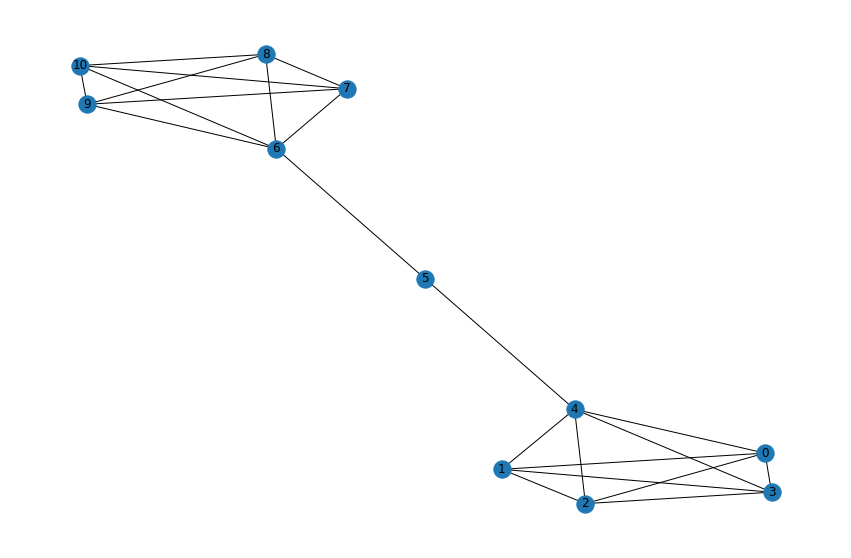

In [3]:
# example 

G = nx.barbell_graph(5,1)

fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw(G,with_labels=True)

In [4]:
# Exemplo

comm = nx.community.girvan_newman(G)

top_level_comm = next(comm)

next_level_comm = next(comm)

print(sorted(map(sorted, top_level_comm)))
print(sorted(map(sorted, next_level_comm)))

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9, 10]]
[[0, 1, 2, 3, 4], [5], [6, 7, 8, 9, 10]]


In [5]:
comm1 = nx.community.girvan_newman(G)

for it in comm1:
    print(it)

({0, 1, 2, 3, 4}, {5, 6, 7, 8, 9, 10})
({0, 1, 2, 3, 4}, {6, 7, 8, 9, 10}, {5})
({0}, {1, 2, 3, 4}, {6, 7, 8, 9, 10}, {5})
({0}, {1}, {2, 3, 4}, {6, 7, 8, 9, 10}, {5})
({0}, {1}, {2}, {3, 4}, {6, 7, 8, 9, 10}, {5})
({0}, {1}, {2}, {3}, {4}, {6, 7, 8, 9, 10}, {5})
({0}, {1}, {2}, {3}, {4}, {6}, {8, 9, 10, 7}, {5})
({0}, {1}, {2}, {3}, {4}, {6}, {7}, {8, 9, 10}, {5})
({0}, {1}, {2}, {3}, {4}, {6}, {7}, {8}, {9, 10}, {5})
({0}, {1}, {2}, {3}, {4}, {6}, {7}, {8}, {9}, {10}, {5})


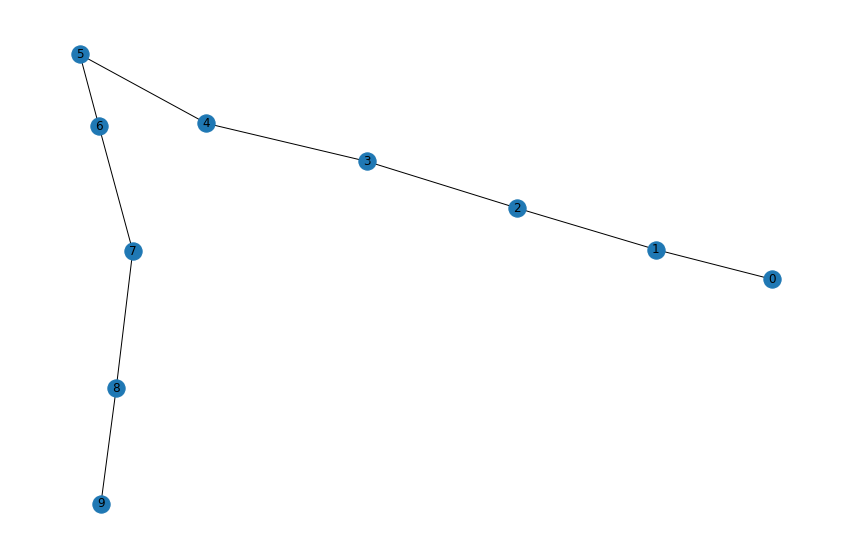

In [6]:
# Exemplo

G = nx.path_graph(10)
#G = nx.path_graph(8)

fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw(G,with_labels=True)

In [7]:
comp = nx.community.girvan_newman(G)

#tuple(sorted(c) for c in next(comp))

tuple(sorted(c) for c in comp)

([{0, 1, 2, 3, 4}, {5, 6, 7, 8, 9}],
 [{0, 1}, {2, 3, 4}, {5, 6, 7, 8, 9}],
 [{0, 1}, {2, 3, 4}, {5, 6}, {7, 8, 9}],
 [{0, 1}, {2}, {3, 4}, {5, 6}, {7, 8, 9}],
 [{0, 1}, {2}, {3, 4}, {5, 6}, {7}, {8, 9}],
 [{0}, {1}, {2}, {3, 4}, {5, 6}, {7}, {8, 9}],
 [{0}, {1}, {2}, {3}, {4}, {5, 6}, {7}, {8, 9}],
 [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8, 9}],
 [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}])

In [8]:
# To just choose an edge to remove based on the weight:

from operator import itemgetter

edges = G.edges()
nx.set_edge_attributes(G, {(u, v): v for u, v in edges}, "weight")

def heaviest(G):
    u, v, w = max(G.edges(data="weight"), key=itemgetter(2))
    return (u, v)

comp = nx.community.girvan_newman(G, most_valuable_edge=heaviest)

#tuple(sorted(c) for c in next(comp))

tuple(sorted(c) for c in comp)

([{0, 1, 2, 3, 4, 5, 6, 7, 8}, {9}],
 [{0, 1, 2, 3, 4, 5, 6, 7}, {8}, {9}],
 [{0, 1, 2, 3, 4, 5, 6}, {7}, {8}, {9}],
 [{0, 1, 2, 3, 4, 5}, {6}, {7}, {8}, {9}],
 [{0, 1, 2, 3, 4}, {5}, {6}, {7}, {8}, {9}],
 [{0, 1, 2, 3}, {4}, {5}, {6}, {7}, {8}, {9}],
 [{0, 1, 2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}],
 [{0, 1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}],
 [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}])

In [9]:
# To utilize edge weights when choosing an edge with, for example, the highest betweenness centrality:

def most_central_edge(G):
    centrality = betweenness(G, weight="weight")
    return max(centrality, key=centrality.get)

comp = nx.community.girvan_newman(G, most_valuable_edge=most_central_edge)

#tuple(sorted(c) for c in next(comp))

tuple(sorted(c) for c in comp)

([{0, 1, 2, 3, 4}, {5, 6, 7, 8, 9}],
 [{0, 1}, {2, 3, 4}, {5, 6, 7, 8, 9}],
 [{0, 1}, {2, 3, 4}, {5, 6}, {7, 8, 9}],
 [{0, 1}, {2}, {3, 4}, {5, 6}, {7, 8, 9}],
 [{0, 1}, {2}, {3, 4}, {5, 6}, {7}, {8, 9}],
 [{0}, {1}, {2}, {3, 4}, {5, 6}, {7}, {8, 9}],
 [{0}, {1}, {2}, {3}, {4}, {5, 6}, {7}, {8, 9}],
 [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8, 9}],
 [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}])

In [9]:
atri = pd.read_csv('../data/harrypotter/hpattributes.txt', sep='\t')
ares = pd.read_csv('../data/harrypotter/hpbook2.txt', sep=' ', header=None)
nome = pd.read_csv('../data/harrypotter/hpnames.txt', sep='\t')

In [10]:
# criando a rede

gpotter = nx.DiGraph()

n = atri.shape[0]

for k in range(n):
    gpotter.add_node(k,
                     nome = nome['name'][k],
                     ano = atri['schoolyear'][k],
                     gen = atri['gender'][k],
                     casa = atri['house'][k])

for k in range(n):
    for m in range(n):
        if ares.values[k][m] == 1:
            gpotter.add_edge(k,m)

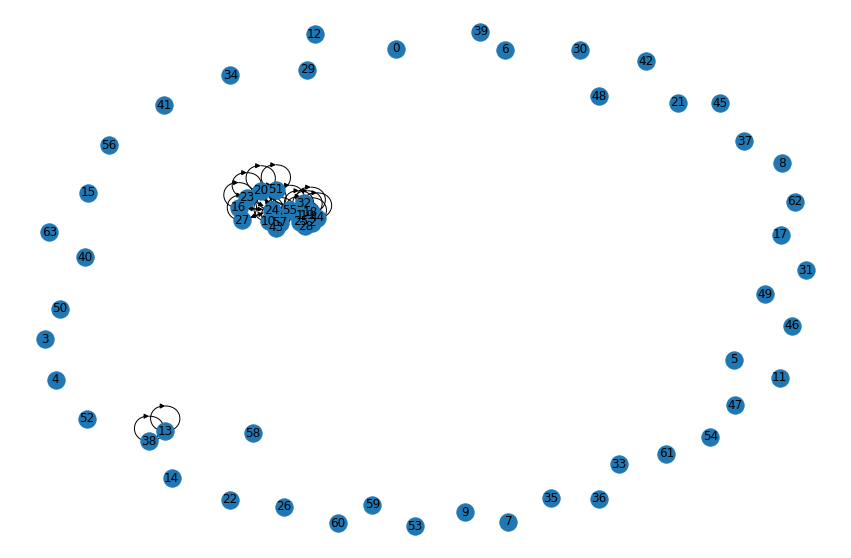

In [11]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw(gpotter,with_labels=True)

In [12]:
# matriz de adjacencia esparsa
A = nx.adjacency_matrix(gpotter)

# apagando os nos isolados
isolados = []
for k in range(n):
    if np.sum(A[[k],:]) == 0:
        isolados.append(k)
        gpotter.remove_node(k)

print(len(isolados), 'nos isolados.')

44 nos isolados.


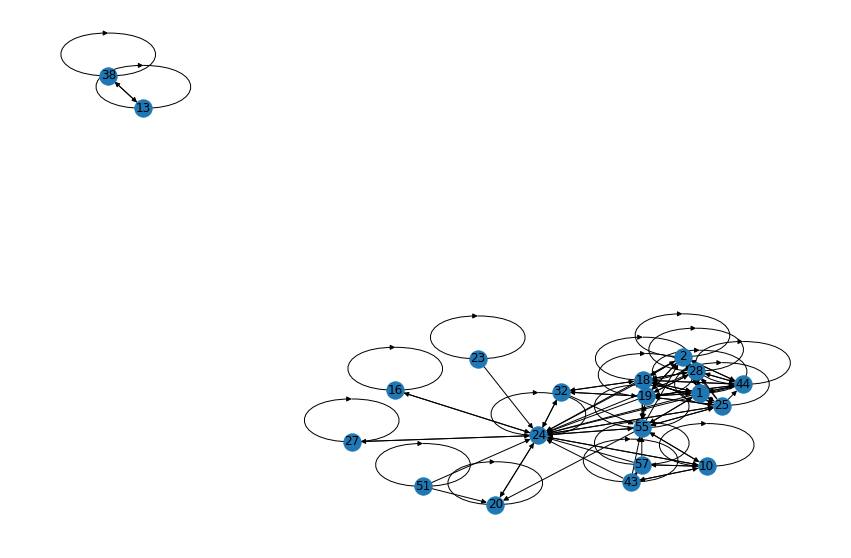

In [13]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw(gpotter,with_labels=True)

In [14]:
# matriz de adjacencia esparsa
A = nx.adjacency_matrix(gpotter)

# matriz de adjacencia densa
A = np.array(A.todense(),dtype=float)

No scripty a seguir a função **girvan_newman** é aplicada a rede de personagens do livro 2 da saga de Harry Potter.

In [15]:
com = cm.girvan_newman(gpotter)
com = list(com)

In [16]:
for it in gpotter.nodes():
    print(it, ':', gpotter.nodes[it]['nome'])

1 : Alicia Spinnet
2 : Angelina Johnson
10 : Dean Thomas
13 : Draco Malfoy
16 : Ernie Macmillan
18 : Fred Weasley
19 : George Weasley
20 : Ginny Weasley
23 : Hannah Abbott
24 : Harry James Potter
25 : Hermione Granger
27 : Justin Finch-Fletchley
28 : Katie Bell
32 : Lee Jordan
38 : Marcus Flint
43 : Neville Longbottom
44 : Oliver Wood
51 : Percy Weasley
55 : Ronald Weasley
57 : Seamus Finnigan


In [17]:
for it in com:
    print(it)

({32, 1, 2, 10, 43, 44, 18, 19, 20, 23, 51, 55, 24, 25, 27, 28, 57}, {13, 38}, {16})
({32, 1, 2, 10, 43, 44, 18, 19, 20, 51, 55, 24, 25, 27, 28, 57}, {13, 38}, {16}, {23})
({32, 1, 2, 10, 43, 44, 18, 19, 20, 51, 55, 24, 25, 28, 57}, {13, 38}, {16}, {23}, {27})
({32, 1, 2, 10, 43, 44, 18, 19, 55, 24, 25, 28, 57}, {13, 38}, {16}, {51, 20}, {23}, {27})
({32, 1, 2, 44, 18, 19, 55, 24, 25, 28}, {57, 10, 43}, {13, 38}, {16}, {51, 20}, {23}, {27})
({1, 2, 44, 18, 19, 55, 24, 25, 28}, {57, 10, 43}, {13, 38}, {16}, {51, 20}, {23}, {27}, {32})
({1, 2, 44, 18, 19, 24, 25, 28}, {57, 10, 43}, {13, 38}, {16}, {51, 20}, {23}, {27}, {32}, {55})
({1}, {2, 44, 18, 19, 24, 25, 28}, {57, 10, 43}, {13, 38}, {16}, {51, 20}, {23}, {27}, {32}, {55})
({1}, {2}, {57, 10, 43}, {13, 38}, {16}, {44, 18, 19, 24, 25, 28}, {51, 20}, {23}, {27}, {32}, {55})
({1}, {2}, {10}, {13, 38}, {16}, {44, 18, 19, 24, 25, 28}, {51, 20}, {23}, {27}, {32}, {57, 43}, {55})
({1}, {2}, {10}, {13}, {16}, {44, 18, 19, 24, 25, 28}, {51, 

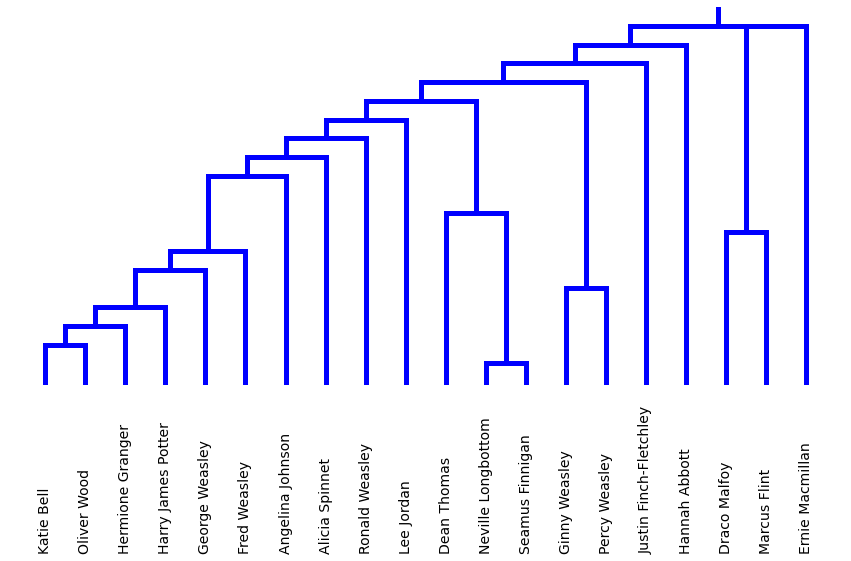

In [18]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

plt.plot([-3.90380859375,-3.90380859375],[0,-20],'b',linewidth=5)
plt.plot([0,-47.8076171875,40,40],[-20,-20,-20,-20],'b', linewidth=5)
plt.plot([40,40],[-20,-400],'b', linewidth=5)
plt.plot([-47.8076171875,-47.8076171875],[-20,-40],'b', linewidth=5)
plt.plot([-75.615234375,-20],[-40,-40],'b', linewidth=5)
plt.plot([-20,-20],[-40,-400],'b', linewidth=5)
plt.plot([-75.615234375,-75.615234375],[-40,-60],'b', linewidth=5)
plt.plot([-111.23046875,-40],[-60,-60],'b', linewidth=5)
plt.plot([-40,-40],[-60,-400],'b', linewidth=5)
plt.plot([-111.23046875,-111.23046875],[-60,-80],'b',linewidth=5)
plt.plot([-152.4609375,-70],[-80,-80],'b', linewidth=5)
# plt.plot([-80,-80],[-80,-100],'b', linewidth=5)
plt.plot([-152.4609375,-152.4609375],[-80,-100],'b', linewidth=5)
plt.plot([-179.921875,-125],[-100,-100],'b', linewidth=5)
# plt.plot([-80,-80],[-80,-100],'b', linewidth=5)
plt.plot([-179.921875,-179.921875],[-100,-120],'b', linewidth=5)
plt.plot([-125,-125],[-100,-220],'b', linewidth=5)
plt.plot([-199.84375,-160],[-120,-120],'b', linewidth=5)
plt.plot([-160,-160],[-120,-400],'b', linewidth=5)
plt.plot([-199.84375,-199.84375],[-120,-140],'b', linewidth=5)
plt.plot([-219.6875,-180],[-140,-140],'b', linewidth=5)
plt.plot([-180,-180],[-140,-400],'b', linewidth=5)
plt.plot([-219.6875,-219.6875],[-140,-160],'b', linewidth=5)
plt.plot([-239.375,-200],[-160,-160],'b', linewidth=5)
plt.plot([-200,-200],[-160,-400],'b', linewidth=5)
plt.plot([-239.375,-239.375],[-160,-180],'b', linewidth=5)
plt.plot([-258.75,-220],[-180,-180],'b', linewidth=5)
plt.plot([-220,-220],[-180,-400],'b', linewidth=5)
# plt.plot([-400,-400],[-180,-200],'b', linewidth=5)
# plt.plot([-120,-120],[-100,-220],'b', linewidth=5)
plt.plot([-140,-120],[-220,-220],'b', linewidth=5)
plt.plot([-140,-140],[-220,-400],'b', linewidth=5)
plt.plot([10,10],[-20,-240],'b', linewidth=5)
plt.plot([00,20],[-240,-240],'b', linewidth=5)
plt.plot([0,0],[-240,-400],'b', linewidth=5)
plt.plot([20,20],[-240,-400],'b', linewidth=5)
plt.plot([-258.75,-258.75],[-180,-260],'b', linewidth=5)
plt.plot([-277.5,-240],[-260,-260],'b', linewidth=5)   
plt.plot([-240,-240],[-260,-400],'b', linewidth=5)

plt.plot([-277.5,-277.5],[-260,-280],'b', linewidth=5)
plt.plot([-295,-260],[-280,-280],'b', linewidth=5)
plt.plot([-260,-260],[-280,-400],'b', linewidth=5)

plt.plot([-70,-70],[-80,-300],'b', linewidth=5)
plt.plot([-80,-60],[-300,-300],'b', linewidth=5)
plt.plot([-80,-80],[-300,-400],'b', linewidth=5)
plt.plot([-60,-60],[-300,-400],'b', linewidth=5)

plt.plot([-295,-295],[-280,-320],'b', linewidth=5)
plt.plot([-315,-280],[-320,-320],'b', linewidth=5)
plt.plot([-280,-280],[-320,-400],'b', linewidth=5)
plt.plot([-315,-315],[-320,-340],'b', linewidth=5)

plt.plot([-340,-320],[-360,-360],'b', linewidth=5)
plt.plot([-340,-340],[-360,-400],'b', linewidth=5)
plt.plot([-320,-320],[-360,-400],'b', linewidth=5)

    
plt.plot([-330,-330],[-340,-360],'b', linewidth=5)
plt.plot([-330,-300],[-340,-340],'b', linewidth=5)
plt.plot([-300,-300],[-340,-400],'b', linewidth=5)


plt.plot([-140,-110],[-220,-220],'b', linewidth=5)
plt.plot([-110,-110],[-220,-380],'b', linewidth=5)
plt.plot([-120,-100],[-380,-380],'b', linewidth=5)
plt.plot([-120,-120],[-380,-400],'b', linewidth=5)
plt.plot([-100,-100],[-380,-400],'b', linewidth=5)

plt.box(False)
plt.xticks([])
plt.yticks([])
plt.ylim(-580,0)
plt.text(-340,-580,gpotter.nodes[28]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)
plt.text(-320,-580,gpotter.nodes[44]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)

plt.text(-300,-580,gpotter.nodes[25]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)

plt.text(-280,-580,gpotter.nodes[24]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)

plt.text(-260,-580,gpotter.nodes[19]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)

plt.text(-240,-580,gpotter.nodes[18]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)

plt.text(-220,-580,gpotter.nodes[ 2]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)

plt.text(-200,-580,gpotter.nodes[ 1]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)

plt.text(-180,-580,gpotter.nodes[55]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)

plt.text(-160,-580,gpotter.nodes[32]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)

plt.text(-140,-580,gpotter.nodes[10]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)
plt.text(-120,-580,gpotter.nodes[43]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)
plt.text(-100,-580,gpotter.nodes[57]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)

plt.text(- 80,-580,gpotter.nodes[20]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)
plt.text(- 60,-580,gpotter.nodes[51]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)

plt.text(- 40,-580,gpotter.nodes[27]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)

plt.text(- 20,-580,gpotter.nodes[23]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)

plt.text(-  0,-580,gpotter.nodes[13]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)
plt.text(+ 20,-580,gpotter.nodes[38]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)

plt.text(+ 40,-580,gpotter.nodes[16]['nome'],rotation='vertical',horizontalalignment='center',fontsize=14)

plt.show()